## Combine protected areas for global processing
- US National Levee Database (NLDB)
- Netherlands

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import geopandas as gpd
import pandas as pd
from sliiders import settings as sset
from sliiders.io import save_geoparquet

In [3]:
nldb = gpd.read_parquet(sset.PATH_NLDB)

Netherlands (assume all of the European Netherlands is protected)

In [4]:
vor_shapes = gpd.read_parquet(sset.PATH_GADM_ADM0_VORONOI).geometry
protected_areas_nld = vor_shapes[["NLD"]].rename_axis("name").reset_index()
protected_areas_nld.index = pd.Index([1], name="id")

Combine

In [5]:
protected_areas = pd.concat((nldb, protected_areas_nld)).rename_axis(
    "protection_zone_id"
)

<AxesSubplot:>

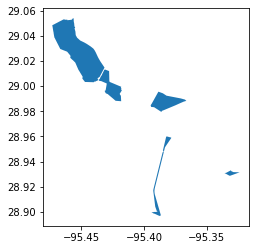

In [33]:
# plot-checking the protected areas
protected_areas.head().plot()

# Save combined areas

In [38]:
save_geoparquet(protected_areas, sset.PATH_COMBINED_PROTECTED_AREAS)